# Data Science z Python 3.10. Drzewa i lasy losowe
## 🇬🇧 Data Science with Python 3.10. Trees and random forest
#### 👨‍🏫 PhD, M.Sc. Psych., M.Sc. IT, Wojciech Oronowicz-Jaśkowiak
#### 🤖 https://github.com/aipogodzinach

### 1. Import bibliotek
#### 🇬🇧 Import libraries

In [232]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz

from sklearn.tree import plot_tree

### 2. Przygotowanie danych do analizy
#### 🇬🇧 Data preparation

In [233]:
# Anaconda
os.getcwd()
base_data = pd.read_csv("DSP_1.csv")

# Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/')
# base_data = pd.read_csv("DSP_1.csv")

In [234]:
base_data.columns
# na tym etapie tworzymy nową zmienną, którą nazywamy base_data, zawierającą nasz zbiór danych

cols = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
data = base_data[cols].copy()
# tworzymy kopię naszych danych bez zbędnych kolumn (np. PassengerID i Name)

In [235]:
data.isnull().any()
# sprawdzamy czy mamy jakiekolwiek brakujące dane

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [236]:
data["Age"].fillna((data["Age"].mean()), inplace=True) # wypełni nam brakujące informacje średnią
data.dropna(subset=['Embarked'], inplace=True)

In [237]:
data.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [238]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [239]:
encoder = LabelEncoder()
data.loc[:,"Sex"] = encoder.fit_transform(data.loc[:,"Sex"])
data.loc[:,"Embarked"] = encoder.fit_transform(data.loc[:,"Embarked"])

### 3. Eksploracja danych
#### 🇬🇧 Data exploration

<AxesSubplot:xlabel='Age', ylabel='SibSp'>

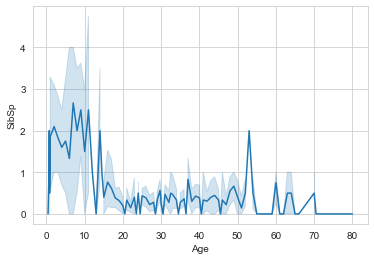

In [240]:
sns.set_style('whitegrid')

sns.lineplot(x='Age', y="SibSp", data=data)

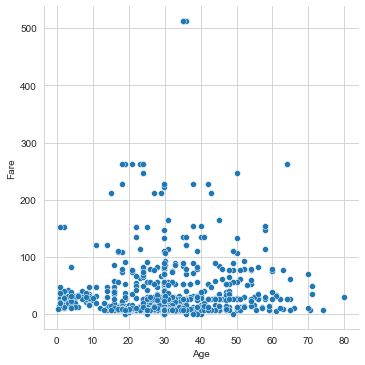

In [241]:
sns.relplot(x='Age',y='Fare',data=data)
# możemy też wygenerować taki wykres, który powie nam więcej o płci osób, które nie przeżyły

### 4. Trenowanie modelu
#### 🇬🇧 Model training

In [242]:
print(data)

     Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0           0       3    1  22.000000      1      0   7.2500         2
1           1       1    0  38.000000      1      0  71.2833         0
2           1       3    0  26.000000      0      0   7.9250         2
3           1       1    0  35.000000      1      0  53.1000         2
4           0       3    1  35.000000      0      0   8.0500         2
..        ...     ...  ...        ...    ...    ...      ...       ...
886         0       2    1  27.000000      0      0  13.0000         2
887         1       1    0  19.000000      0      0  30.0000         2
888         0       3    0  29.699118      1      2  23.4500         2
889         1       1    1  26.000000      0      0  30.0000         0
890         0       3    1  32.000000      0      0   7.7500         1

[889 rows x 8 columns]


In [243]:
y = data.iloc[:,0] # survived - zmienna, którą będziemy chcieli przewidzieć
x = data.iloc[:,1:8] # zmienne na podstawie, których chcemy przewidzieć
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# test size odnosi się do liczby obserwacji przeznaczonej do wytrenowania modelu

In [244]:
def model(X_train, y_train):
    
    forest = RandomForestClassifier (n_estimators=20, random_state=0)
    forest.fit(X_train,y_train)
    print("Random Forest: {0}".format(forest.score(X_train,y_train)))
    
    lreg = LogisticRegression(max_iter = 1000) # tworzymy regresję logistyczną znaną z poprzednich zajęć
    lreg.fit(X_train,y_train)
    print("Regresja logistyczna: {0}".format(lreg.score(X_train,y_train)))
  
    tree = DecisionTreeClassifier()
    tree.fit(X_train,y_train)
    print("Decision Tree: {0}".format(tree.score(X_train,y_train)))
   
    return forest, lreg, tree

forest, lreg, tree = model(X_train,y_train)

Random Forest: 0.980309423347398
Regresja logistyczna: 0.8213783403656821
Decision Tree: 0.9845288326300985


In [245]:
y1_predict = forest.predict(X_test)
print("Random Forest {0}".format(accuracy_score(y_test, y1_predict)))

y2_predict = lreg.predict(X_test)
print("Logistic Regresion {0}".format(accuracy_score(y_test, y2_predict)))

y3_predict = tree.predict(X_test)
print("Decision Tree {0}".format(accuracy_score(y_test, y3_predict)))

# uzyskujemy dzięki temu informacje dotyczącą dokładności modelu 

Random Forest 0.7640449438202247
Logistic Regresion 0.7134831460674157
Decision Tree 0.7752808988764045


In [246]:
print("Ocena modelu 1. Random Forest")
print(classification_report(y_test,y1_predict))

print("Ocena modelu 2. Regresja logistyczna")
print(classification_report(y_test,y2_predict))

print("Ocena modelu 3. Decision Tree")
print(classification_report(y_test,y3_predict))

# uzyskujemy informację o precyzji, recall, f1, etc.
# te wszystkie dane przydadzą się nam do oceny naszego modelu

Ocena modelu 1. Random Forest
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       105
           1       0.75      0.63      0.69        73

    accuracy                           0.76       178
   macro avg       0.76      0.74      0.75       178
weighted avg       0.76      0.76      0.76       178

Ocena modelu 2. Regresja logistyczna
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       105
           1       0.67      0.59      0.63        73

    accuracy                           0.71       178
   macro avg       0.70      0.69      0.70       178
weighted avg       0.71      0.71      0.71       178

Ocena modelu 3. Decision Tree
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       105
           1       0.76      0.66      0.71        73

    accuracy                           0.78       178
   macro avg       0.77      0.

### 5. Eksport modelu
#### 🇬🇧 Model export

In [247]:
filename = "model.sv"
pickle.dump(forest, open(filename,'wb'))
# Widzimy, że dobrymi parametrami cechuje się model pierwszy - eksportujemy go do pickle

Możemy się jeszcze chwilę "pobawić" i sprawdzić czy np. osoba z klasy pasażerskiej 1, będąca mężczyzną w wieku 50 lat, nieposiadająca innych członków rodziny, itd. przeżyłaby podróż. Odczytujemy wynik i widzimy, że niestety nie przeżyłaby podróży. Do porównania drugi przykład (kobieta w wieku 20 lat) - model podpowiada nam, że ta osoba przeżyłaby podróż.

In [248]:
my_data =[
            [
             2,  #"Pclass"
             1,  #"Sex", Sex 0 = Female, 1 = Male
             63,  #"Age", Age
             0,  #"SibSp"
             0,  #"Parch"
             0,  #"Fare", 
             2,  #"Embarked"
    ]
]

forest.predict(my_data)

array([0], dtype=int64)

### 📚 Zadanie 1.
##### Załaduj plik DSP_2.csv. Wytrenuj nowe modele ML (drzewa, lasy losowe i regresja logistyczna) dla nowego zbioru danych. Wykorzystaj informacje z bazy danych do przewidzenia wartości kolumny HeartDisease. Który model, dla tego zbioru danych, cechuje się najlepszymi parametrami?

##### 🇬🇧 Load the DSP_2.csv file. Train new ML models (trees, random forests, and logistic regression) for the new dataset. Predict the value of the HeartDisease. Which model has the best parameters for this dataset?

In [249]:
df = pd.read_csv("DSP_2.csv")

In [250]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [251]:
df.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [252]:
encoder = LabelEncoder()
df.loc[:,"Sex"] = encoder.fit_transform(df.loc[:,"Sex"])
df.loc[:,"ChestPainType"] = encoder.fit_transform(df.loc[:,"ChestPainType"])
df.loc[:,"RestingECG"] = encoder.fit_transform(df.loc[:,"RestingECG"])
df.loc[:,"ExerciseAngina"] = encoder.fit_transform(df.loc[:,"ExerciseAngina"])
df.loc[:,"ST_Slope"] = encoder.fit_transform(df.loc[:,"ST_Slope"])

In [253]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [254]:
y = df.iloc[:,-1] 
x = df.iloc[:,0:-1]

In [255]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [256]:
def model(X_train, y_train):
    
    forest = RandomForestClassifier (n_estimators=12, random_state=0)
    forest.fit(X_train,y_train)
    print("Random Forest: {0}".format(forest.score(X_train,y_train)))
    
    lreg = LogisticRegression(max_iter = 1000)
    lreg.fit(X_train,y_train)
    print("Regresja logistyczna: {0}".format(lreg.score(X_train,y_train)))
  
    tree = DecisionTreeClassifier()
    tree.fit(X_train,y_train)
    print("Decision Tree: {0}".format(tree.score(X_train,y_train)))
   
    return forest, lreg, tree

forest, lreg, tree = model(X_train,y_train)

Random Forest: 1.0
Regresja logistyczna: 0.8596730245231607
Decision Tree: 1.0


In [257]:
y1_predict = forest.predict(X_test)
print("Random Forest {0}".format(accuracy_score(y_test, y1_predict)))

y2_predict = lreg.predict(X_test)
print("Logistic Regresion {0}".format(accuracy_score(y_test, y2_predict)))

y3_predict = tree.predict(X_test)
print("Decision Tree {0}".format(accuracy_score(y_test, y3_predict)))

Random Forest 0.8532608695652174
Logistic Regresion 0.8369565217391305
Decision Tree 0.7608695652173914


In [258]:
print("Ocena modelu 1. Random Forest")
print(classification_report(y_test,y1_predict))

print("Ocena modelu 2. Regresja logistyczna")
print(classification_report(y_test,y2_predict))

print("Ocena modelu 3. Decision Tree")
print(classification_report(y_test,y3_predict))

Ocena modelu 1. Random Forest
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        77
           1       0.87      0.88      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Ocena modelu 2. Regresja logistyczna
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        77
           1       0.84      0.89      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

Ocena modelu 3. Decision Tree
              precision    recall  f1-score   support

           0       0.68      0.82      0.74        77
           1       0.85      0.72      0.78       107

    accuracy                           0.76       184
   macro avg       0.76      0.

### 📚 Zadanie 2.
##### Poszukaj informacji związanych z wizualizacją drzew decyzyjnych (np. tutaj https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c). Spróbuj zastosować podobny kod do Twoich danych, żeby pokazać proces decyzyjny dla DSP_2.csv.

##### 🇬🇧 Search for information about Decision Tree Visualisation (for example https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c). Apply code to your data and show visualisation.

In [259]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

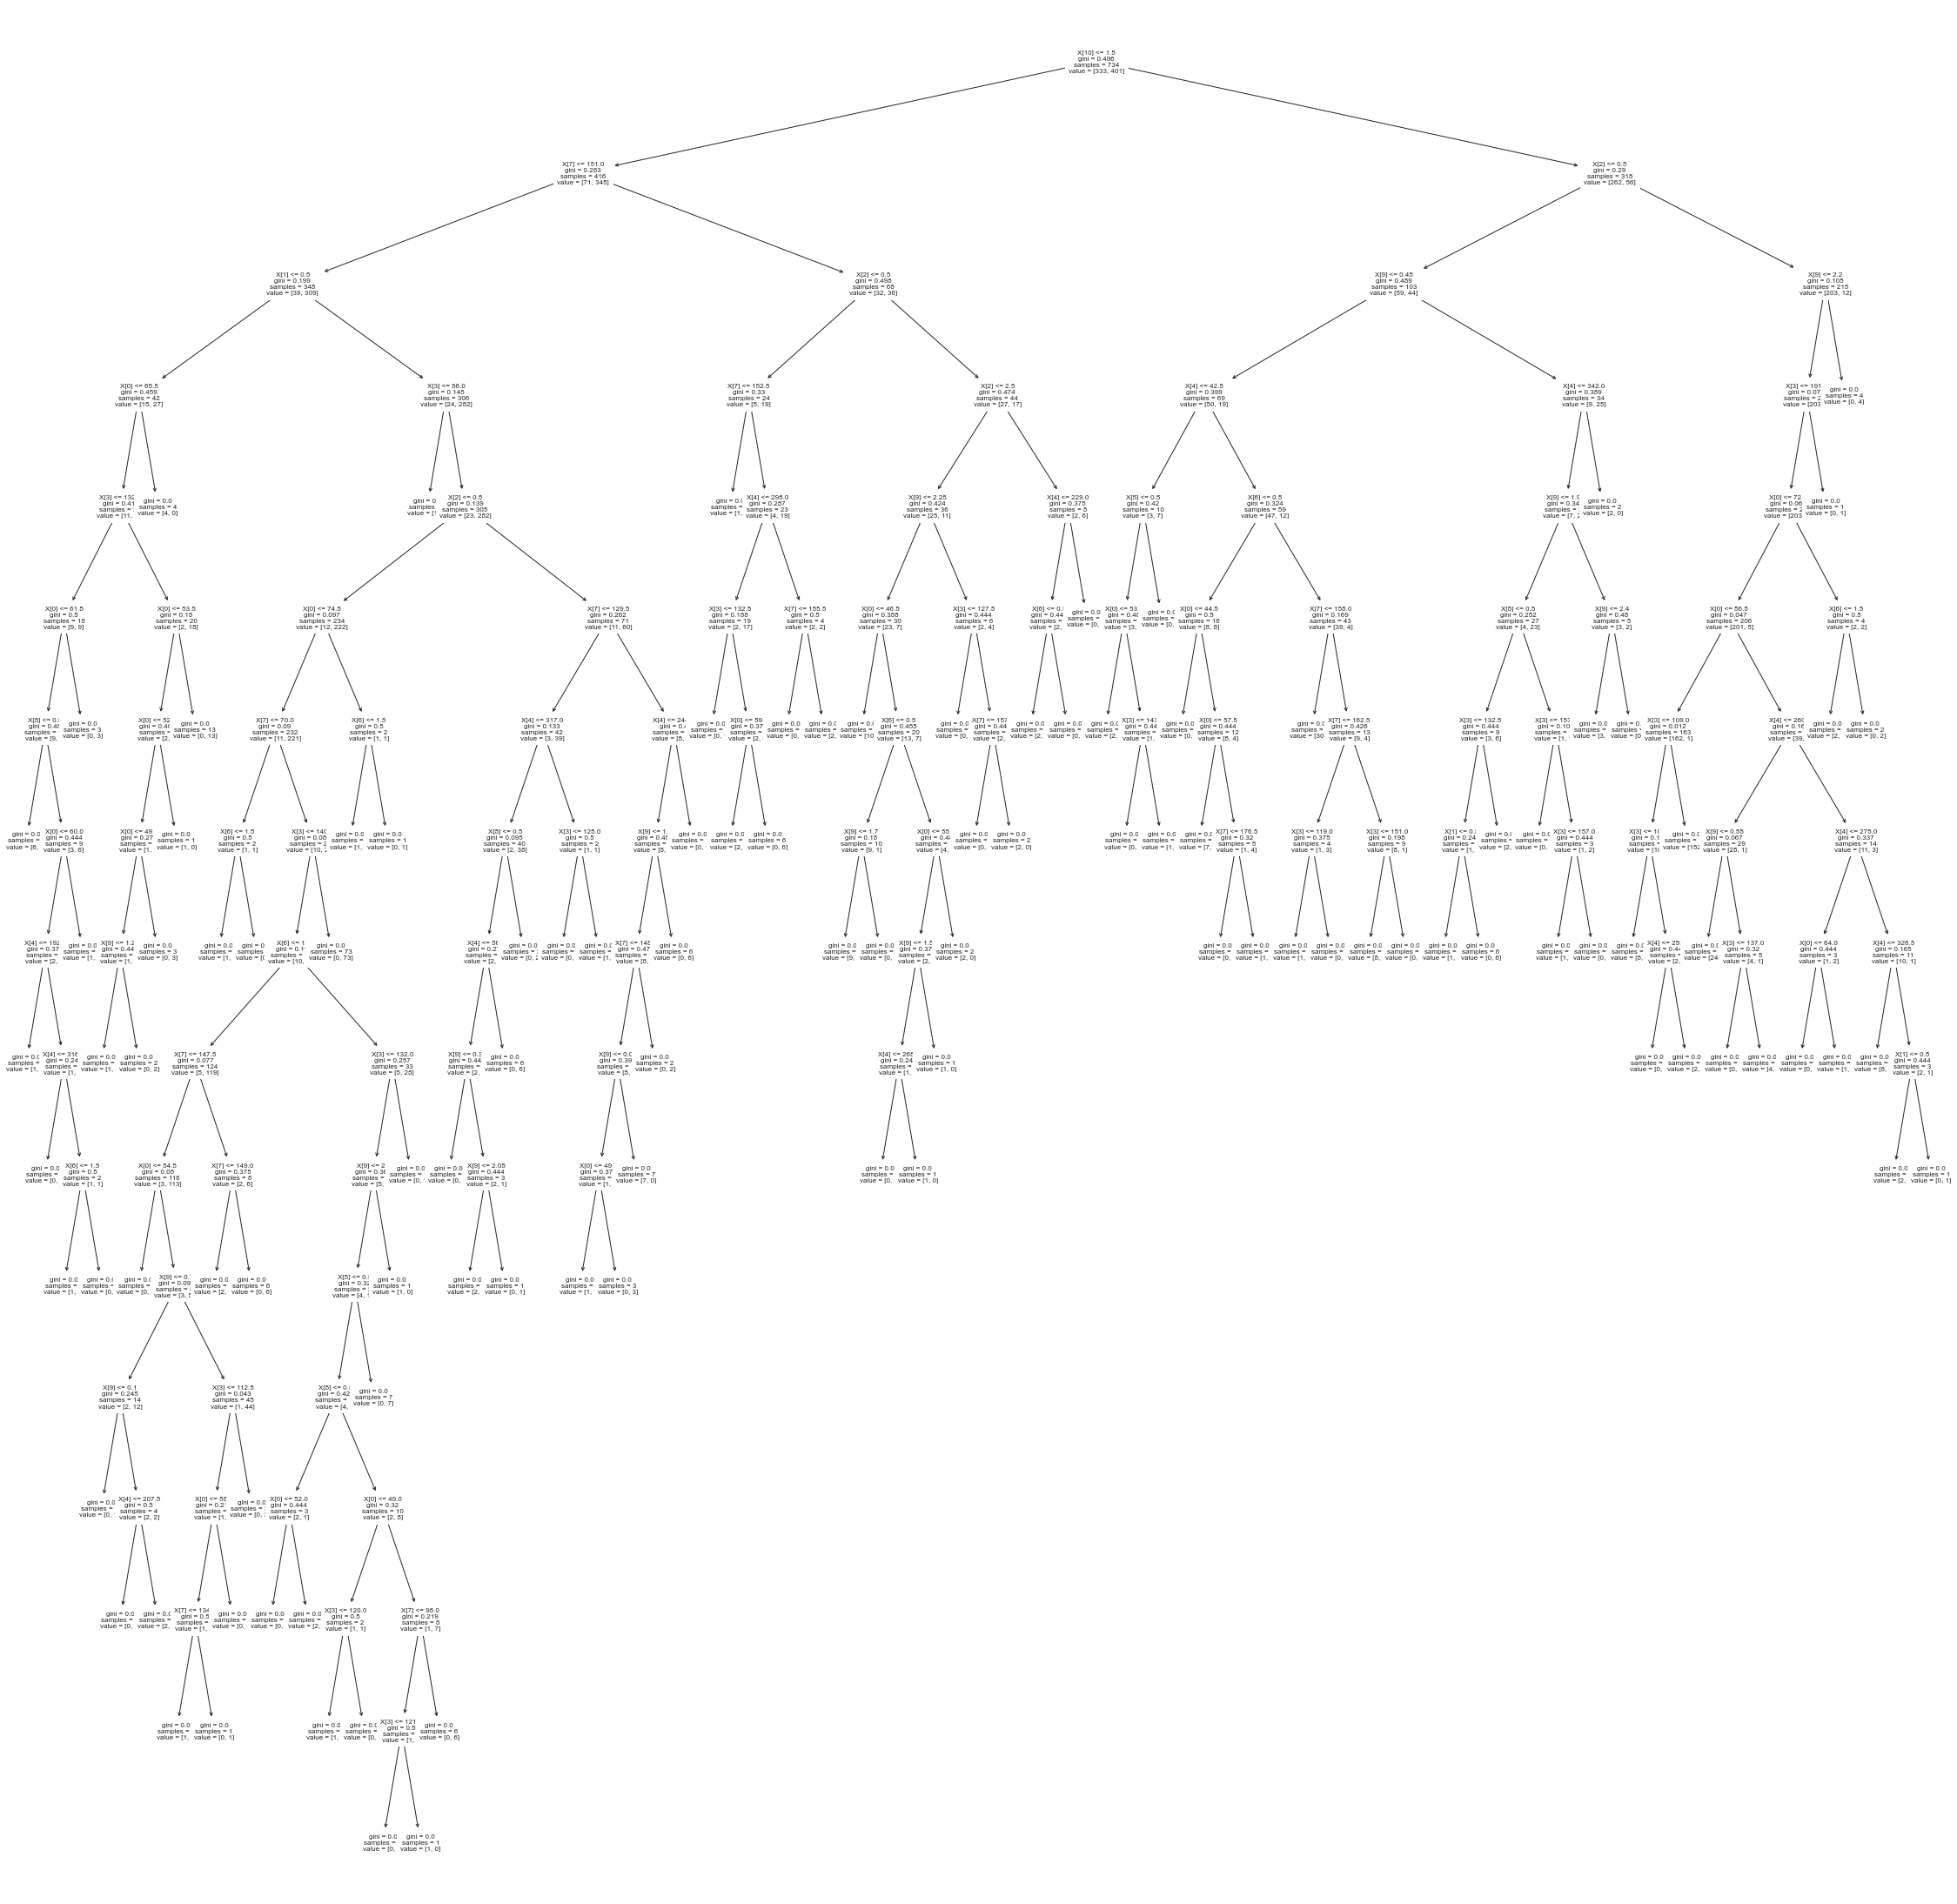

In [262]:
plt.figure(figsize=(40,40))
tree.plot_tree(clf, fontsize=8)
plt.show()